In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Mount notebook (for Google Colab users)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Income_census_data.csv')
df.head()

,age,education.num,sex,hours.per.week,income
0,90,9,Female,40,30k or less
1,82,9,Female,18,30k or less
2,66,10,Female,40,30k or less
3,54,4,Female,40,30k or less
4,41,10,Female,40,30k or less


In [ ]:
# Unique entries for categorical variables
df['income'].unique()

array(['30k or less', 'Over 30k'], dtype=object)

In [ ]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Encoding categorical variables
df['income'] = df['income'].map({'30k or less': 0, 'Over 30k': 1})
df.head()

,age,education.num,sex,hours.per.week,income
0,90,9,Female,40,0
1,82,9,Female,18,0
2,66,10,Female,40,0
3,54,4,Female,40,0
4,41,10,Female,40,0


In [ ]:
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df.head()

,age,education.num,sex,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [ ]:
# Independent and dependent variables
X = df[['age', 'education.num', 'sex', 'hours.per.week']]
y = df['income']

In [ ]:
X.shape, y.shape

((29291, 4), (29291,))

In [ ]:
# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Initialise logistic regression model
model = LogisticRegression()

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[4180,  285],
       [ 864,  530]])

Text(0.5, 1.0, 'Confusion Matrix')

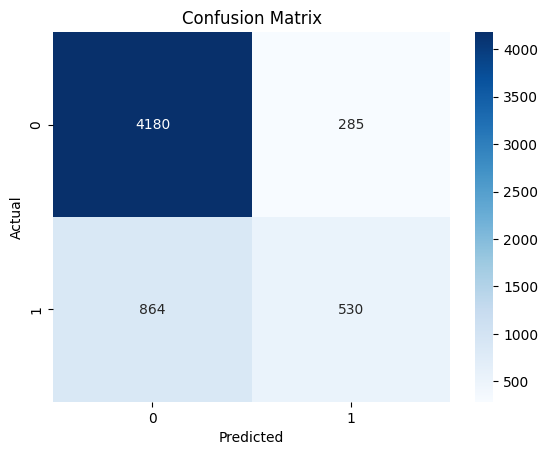

In [ ]:
# Enhancing confusion matrix visualisation
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
TN = conf_matrix[0, 0] # True negative
FP = conf_matrix[0, 1] # False positive
FN = conf_matrix[1, 0] # False negative
TP = conf_matrix[1, 1] # True positive

The task doc explains how you can use TN, FP, FN and TP above to calculate accuracy, precison and recall.

In [ ]:
# Multi-class Logistic Regression set up
model = LogisticRegression(multi_class = 'multinomial')
model.fit(X_train, y_train)